# Homework II

### Grupo 003

(ist1107028) Inês Paredes

(ist1107137) Margarida Lourenço


## II. Programming and critical analysis [11v]

In the next exercise you will use the accounts.csv dataset. This dataset contains account details
of bank clients, and the target variable y is binary (‘has the client subscribed a term deposit?’).
Select the ﬁrst 8 features and remove duplicates and null values. Normalize the data

**Hint:** You can use get_dummies() to change the feature type from categorical to numerical
(e.g. pd.get_dummies(data, drop_ﬁrst=True))

**1) Normalize the data using MinMaxScaler:**

**a. [4v] Using sklearn, apply k-means clustering (without targets) on the normalized data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the diﬀerent sum of squared errors (SSE) using the _inertia attribute of k-means according to the number of clusters.**

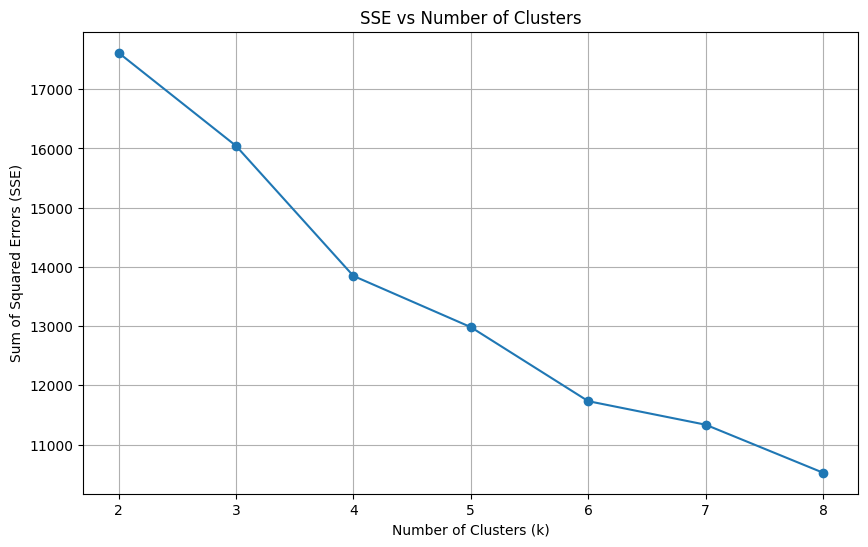

In [40]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('accounts.csv')
df = data.iloc[:, :8]
df = df.drop_duplicates().dropna()

# Convert categorical to numerical
data_dummies = pd.get_dummies(df, drop_first=True)

scaler = MinMaxScaler()
dn = scaler.fit_transform(data_dummies)

SSE = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(dn)
    SSE.append(kmeans.inertia_)

# Plot SSE vs number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), SSE, marker='o')
plt.title('SSE vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


**b. [1.5v] According to the previous plot, how many underlying customer segments (clusters)
should there be ? Explain based on the trade oﬀ between the clusters and inertia.**

As we can see in the previous plot, Sum of Squared Errors (SSE) decreases as the number of clusters (k) increases which means more clusters lead to better partitioning and lower variance (inertia).
The highest decrease in SEE is in between k = 2 and k = 4. After that, it becomes more gradual, so there is a lower benefit for adding more clusters. Therefore, we suppose k = 4 is a reasonable number, as it balances the trade-off between cluster complexity and inertia.

**c. [1.5v] Would k-modes be a better clustering approach ? Explain why based on the dataset
features.**

The dataset contains a mix of categorical features (job, marital, education, default, housing, loan, contact, month, poutcome, and deposit) and numerical features (age, balance, day, duration, campaign, pdays, previous). K-means clustering works by minimizing euclidean distance, which is effective for numerical data but unsuitable for categorical data and since this dataset has more categorical features, k-modes would be a better approach because instead of minimizing variance, it minimizes dissimilarity based on matching categories.

**2) Normalize the data using StandardScaler:**

**a. [1v] Apply PCA to the data. How much variability is explained by the top 2 components?**

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('accounts.csv')
df = data.iloc[:, :8] 
df = df.drop_duplicates().dropna()

# Convert categorical to numerical
data_dummies = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()

# Apply PCA
pca = PCA(n_components=2)  # Use 2 components
X_pca = pca.fit_transform(scaler.fit_transform(data_dummies))

print(f"Explained Variance Ratio for Top 2 PCs: {pca.explained_variance_ratio_}")
print(f"Total variability: {pca.explained_variance_ratio_.sum() * 100:.2f}%")

Explained Variance Ratio for Top 2 PCs: [0.11679024 0.11075988]
Total variability: 22.76%


Variability explained by the top 2 components: 22.76%

**b. [1v] Apply k-means clustering with k=3 and random_state=42 (all other arguments as default) and use the original 8 features. Next, provide a scatterplot according to the ﬁrst 2 principal components. Can we clearly separate the clusters? Justify.**

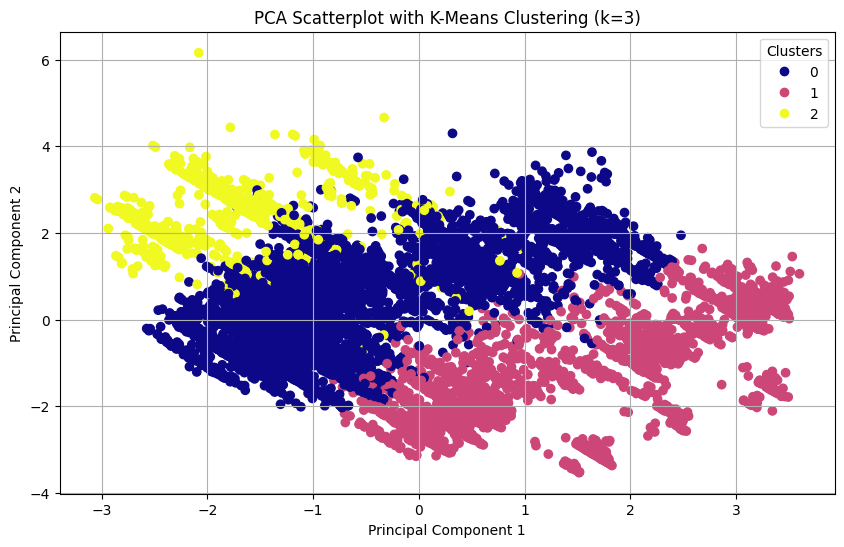

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('accounts.csv')
df = data.iloc[:, :8]
df = df.drop_duplicates().dropna()

# Convert categorical to numerical
data_dummies = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2).fit_transform(scaler.fit_transform(data_dummies))

# Perform K-Means clustering
clusters = KMeans(n_clusters=3, random_state=42).fit_predict(scaler.fit_transform(data_dummies))

# Plot a scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca[:, 0], pca[:, 1], c=clusters, cmap='plasma')
plt.title('PCA Scatterplot with K-Means Clustering (k=3)')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Some separation is visible for k-mean clustering with k = 3, but we can't say that they are clearly distinct since there is an overlap, which indicates that these clusters don't have distinct boundaries.

**c[2v] Plot the cluster conditional features of the frequencies of “job” and ”education” according to the clusters obtained in the previous question (2b.). Use sns.displot (see Data Exploration notebook), with multiple="dodge", stat='density', shrink=0.8 and common_norm=False. Describe the main diﬀerences between the clusters in no more than half a page.**

<Figure size 1200x600 with 0 Axes>

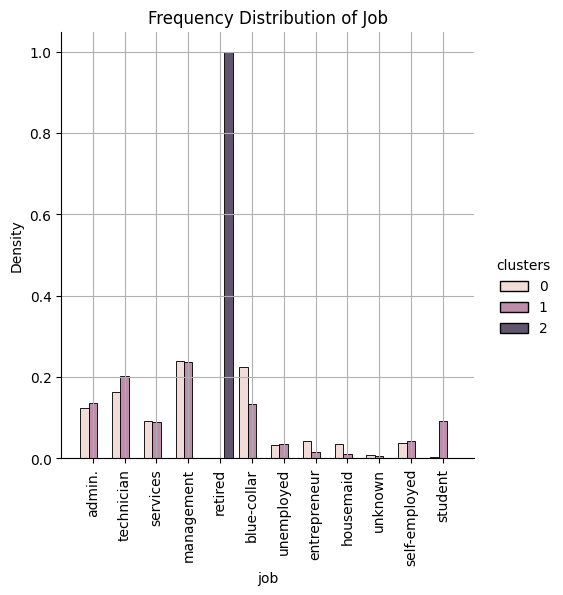

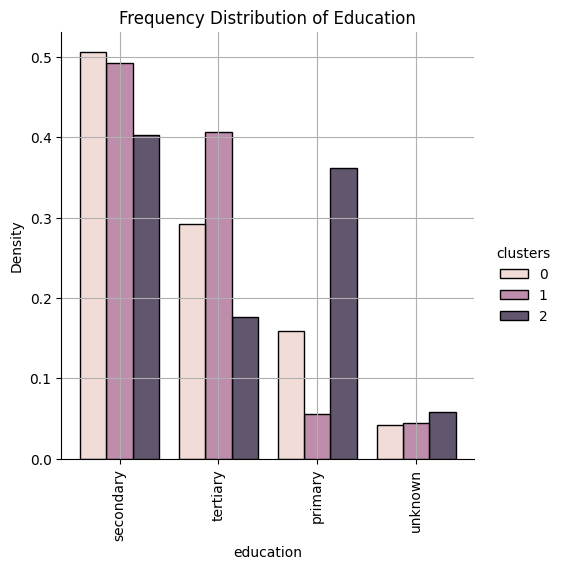

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Load the data
data = pd.read_csv('accounts.csv')
df = data.iloc[:, :8]
df = df.drop_duplicates().dropna()

df["clusters"] = clusters

plt.figure(figsize=(12, 6))

# Plot for "job"
sns.displot(data=df, x="job", hue ="clusters", multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.title('Frequency Distribution of Job')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot for "education"
sns.displot(data=df, x="education", hue ="clusters", multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.title('Frequency Distribution of Education')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<u>For job frequency distribution:</u>

- Cluster 0: Has relatively high density in **management** and **blue-collar**, which suggests that it is representing workers from a more traditional or stable sector.

- Cluster 1: Has very low density in **unemployment**, **entreprenour**, **housemaid**, **self-employed** and practically zero for **unknown**. It is highly dense in **technician**, **management**, **blue-color** and **admin** which let us belive that represents worker from labor sector.

- Cluster 2: Since has density equal to zero for every job except for **retired**, it represents retired individuals.

<u>For education frequency distribution:</u>

- Cluster 0: The highest density value occurs in **secondary**, always decreasing for the remaining levels (in the order presented above), meaning it represents individuals with mid-level education.

- Cluster 1: Also has the highest density in **secondary**, but the value in **tertiary** is also pretty high. We can notice a large descent for the remaining levels (primary and unknown), these ones having almost the same value between each other. Thus, it represents people with higher-level education.

- Cluster 2: The highest values of density are found in **secondary** and **primary**, which suggests that it is refering to individuals with basic education.

In conclusion, cluster 0 seems to represent people with secondary education who work in blue-color and managment jobs, cluster 1 contains well-educated individuals working mostly on technician and management jobs and cluster 2 consists mainly of people with primary and secondary education, but also having the largest amount of individual in unknown education, who are retired.